In [1]:
!pip install tensorflow-gpu=

ERROR: Invalid requirement: 'tensorflow-gpu='
Hint: = is not a valid operator. Did you mean == ?


In [8]:
from random import randint, shuffle
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_labels=[]
train_samples=[]

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
    
print("train_samples")
print(train_samples)
print("train_labels")
print(train_labels)


train_samples
[35, 88, 16, 65, 26, 74, 64, 93, 46, 67, 40, 98, 14, 66, 14, 89, 48, 84, 29, 95, 48, 92, 54, 90, 19, 93, 50, 68, 62, 86, 50, 87, 47, 100, 50, 85, 57, 81, 20, 77, 23, 93, 13, 100, 37, 78, 35, 70, 39, 87, 64, 94, 28, 71, 31, 70, 21, 67, 40, 93, 44, 93, 41, 69, 22, 82, 37, 96, 21, 68, 50, 97, 14, 97, 38, 97, 62, 79, 57, 86, 28, 87, 21, 75, 16, 67, 24, 71, 32, 66, 23, 94, 23, 68, 39, 99, 32, 92, 52, 92, 25, 89, 40, 78, 63, 67, 42, 86, 28, 71, 37, 95, 52, 86, 57, 69, 48, 92, 30, 94, 30, 76, 32, 93, 51, 93, 50, 74, 32, 66, 52, 72, 60, 100, 46, 79, 32, 78, 54, 85, 15, 84, 58, 100, 29, 83, 45, 71, 31, 98, 17, 81, 41, 88, 61, 65, 43, 85, 40, 66, 47, 97, 33, 68, 55, 96, 59, 66, 21, 92, 20, 96, 21, 71, 52, 80, 41, 95, 18, 67, 47, 98, 54, 74, 22, 77, 30, 95, 60, 89, 15, 66, 14, 81, 44, 75, 64, 98, 49, 70, 42, 97, 14, 99, 47, 90, 46, 77, 53, 98, 51, 73, 25, 91, 22, 77, 28, 87, 61, 67, 64, 75, 14, 81, 51, 74, 30, 72, 46, 74, 13, 67, 53, 86, 21, 93, 52, 66, 22, 83, 19, 87, 13, 89, 54, 6

In [9]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [10]:
train_labels

array([1, 0, 0, ..., 1, 0, 1])

In [11]:
train_samples

array([20, 69, 98, ..., 54, 88, 37])

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
scaled_train_samples.tolist()

In [1]:
!pip install tensorflow --user

  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)


In [ ]:
!pip uninstall h5py

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [14]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Number of GPUs available:", len(physical_devices))
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


Number of GPUs available: 1


In [15]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax"),
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.7235 - accuracy: 0.3741 - val_loss: 0.6959 - val_accuracy: 0.4810
Epoch 2/30
189/189 - 0s - loss: 0.6715 - accuracy: 0.5561 - val_loss: 0.6554 - val_accuracy: 0.5571
Epoch 3/30
189/189 - 0s - loss: 0.6253 - accuracy: 0.6788 - val_loss: 0.6057 - val_accuracy: 0.7381
Epoch 4/30
189/189 - 0s - loss: 0.5791 - accuracy: 0.7672 - val_loss: 0.5623 - val_accuracy: 0.7667
Epoch 5/30
189/189 - 0s - loss: 0.5367 - accuracy: 0.8138 - val_loss: 0.5187 - val_accuracy: 0.8381
Epoch 6/30
189/189 - 0s - loss: 0.4951 - accuracy: 0.8455 - val_loss: 0.4731 - val_accuracy: 0.8762
Epoch 7/30
189/189 - 0s - loss: 0.4527 - accuracy: 0.8772 - val_loss: 0.4284 - val_accuracy: 0.9190
Epoch 8/30
189/189 - 0s - loss: 0.4134 - accuracy: 0.8989 - val_loss: 0.3880 - val_accuracy: 0.9286
Epoch 9/30
189/189 - 0s - loss: 0.3765 - accuracy: 0.9175 - val_loss: 0.3504 - val_accuracy: 0.9381
Epoch 10/30
189/189 - 0s - loss: 0.3426 - accuracy: 0.9222 - val_loss: 0.3145 - val_accuracy: 0.9476

In [19]:
test_labels=[]
test_samples=[]

for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
    
print("test_samples")
print(test_samples)
print("test_labels")
print(test_labels)


test_samples
[61, 66, 63, 98, 51, 81, 54, 82, 54, 65, 24, 79, 44, 70, 41, 84, 39, 85, 44, 74, 23, 100, 16, 71, 56, 71, 41, 65, 27, 71, 48, 90, 63, 78, 36, 72, 39, 99, 15, 92, 57, 86, 31, 77, 29, 66, 31, 65, 55, 99, 22, 71, 45, 86, 29, 79, 42, 85, 31, 71, 56, 99, 25, 92, 26, 98, 41, 89, 43, 86, 35, 80, 42, 74, 16, 92, 38, 79, 13, 74, 37, 93, 37, 66, 62, 100, 60, 93, 32, 72, 28, 88, 59, 100, 23, 97, 58, 73, 44, 77, 14, 79, 19, 96, 25, 87, 37, 69, 59, 96, 57, 79, 21, 77, 39, 72, 27, 85, 15, 72, 21, 66, 51, 66, 19, 68, 18, 68, 22, 68, 46, 85, 42, 96, 62, 95, 64, 79, 26, 65, 38, 99, 31, 84, 30, 78, 26, 83, 31, 70, 48, 89, 36, 67, 38, 95, 27, 78, 60, 98, 16, 84, 43, 88, 28, 91, 29, 79, 50, 87, 60, 86, 25, 88, 21, 95, 35, 99, 46, 65, 39, 78, 46, 70, 41, 77, 26, 74, 15, 99, 43, 77, 14, 99, 17, 87, 61, 75, 60, 95, 22, 94, 43, 83, 35, 99, 29, 98, 23, 70, 53, 74, 42, 72, 21, 76, 16, 74, 18, 94, 46, 72, 32, 66, 39, 68, 44, 82, 40, 84, 16, 69, 49, 90, 47, 90, 52, 80, 55, 82, 53, 77, 59, 74, 50, 96,

In [20]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [21]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [22]:
scaled_test_samples

array([[0.56321839],
       [0.71264368],
       [0.96551724],
       ...,
       [0.44827586],
       [0.57471264],
       [0.26436782]])

In [23]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
predictions

array([[0.450051  , 0.549949  ],
       [0.92929184, 0.07070819],
       [0.99629945, 0.00370055],
       ...,
       [0.08817693, 0.91182303],
       [0.50327456, 0.49672544],
       [0.00611422, 0.9938858 ]], dtype=float32)

In [ ]:
for i in predictions:
    print(i)

In [25]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1050    0]
 [  43 1007]]


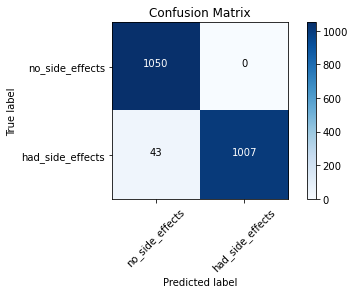

In [29]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [30]:
import os.path

if os.path.isdir("./models") is False:
    try:
        os.mkdir("./models")
    except:
        pass

if os.path.isfile("models/medical_trial_model.h5") is False:
    model.save("models/medical_trial_model.h5")

In [31]:
from tensorflow.keras.models import load_model

new_model = load_model("models/medical_trial_model.h5")

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
!ls

CNN.ipynb
MobileNet.ipynb
YT - Keras with TensorFlow Course - Python Deep Learning and Neural Networks for Beginners Tutorial.ipynb
data
models
train.zip
